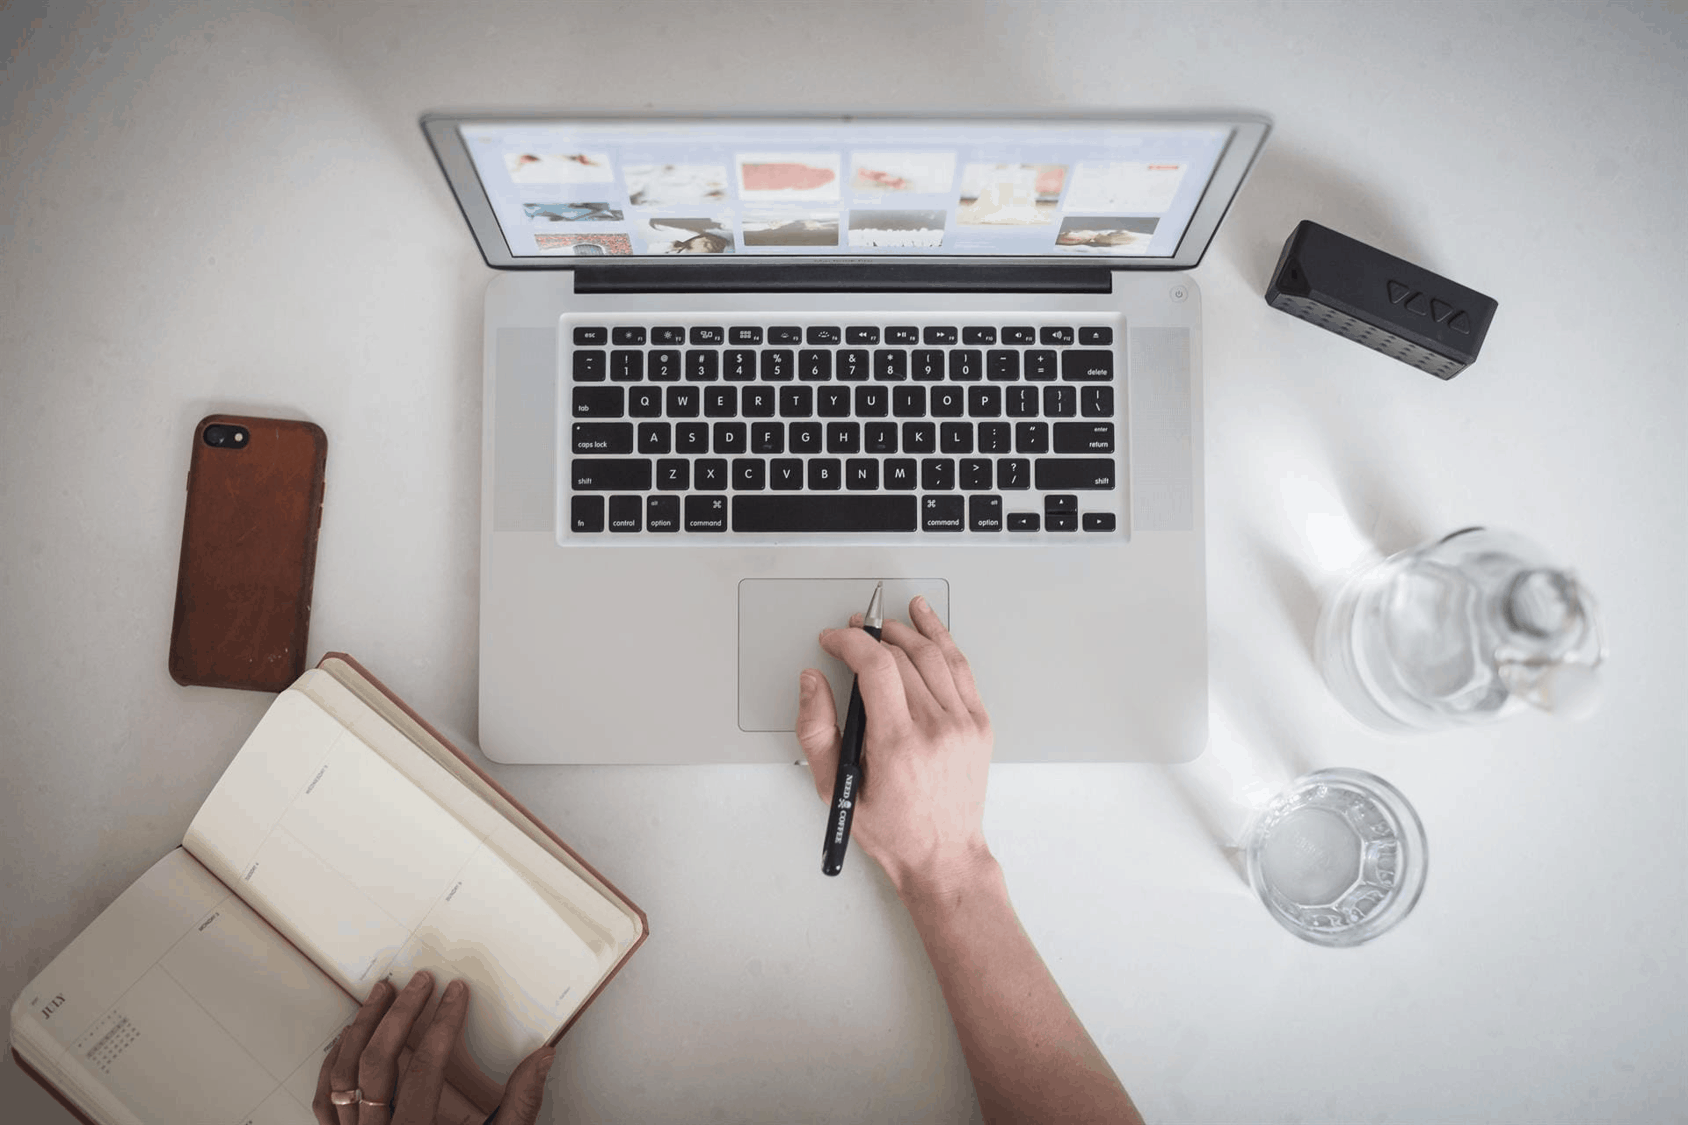

In [1]:
from IPython.display import Image
import os
Image("../input/photos/1-2.png")

In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
d_info=pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')
p_info=pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')
import glob
path='../input/learnplatform-covid19-impact-on-digital-learning/engagement_data'
filepath=glob.glob(path+'/*')
datalist=[]
for file in filepath:
    df=pd.read_csv(file)
    d_id=file.split('/')[4].split('.')[0]
    df["d_id"] = d_id
    datalist.append(df)
engage_df=pd.concat(datalist)
engage_df.reset_index(drop=True)
engage_df.head()

/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/README.md
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/9812.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/2339.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5404.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5150.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1624.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/3188.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/7964.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learni

,time,lp_id,pct_access,engagement_index,d_id
0,2020-01-01,92844.0,0.01,0.68,6345
1,2020-01-01,64838.0,0.01,0.68,6345
2,2020-01-01,94058.0,0.00,NaN,6345
3,2020-01-01,26488.0,0.03,26.21,6345
4,2020-01-01,32340.0,0.01,0.11,6345


# **關於本次競賽**
**背景**

COVID-19 大流行已經擾亂了美國超過 5600 萬學生的學習。2020 年春季，美國大部分州和地方政府關閉了教育機構，以阻止病毒傳播。作為回應，學校和教師試圖通過遠程學習工具和數位平台遠程接觸學生。直到今天，對美國最弱勢學習者日益加劇的數字鴻溝和長期學習損失的擔憂仍在繼續增長。


**目標**


* 探索2020 年數位學習的狀態 

* 數位學習的參與如何與地區人口統計、寬帶接入以及州/國家級政策和事件等因素相關。

* 2020 年的數位連接和參與情況如何？
* COVID-19 大流行對在線和遠程學習有什麼影響，這在未來還會如何發展？
* 在大流行的過程中，學生對不同類型教育技術的參與如何變化？
* 學生對在線學習平台的參與如何與不同的地理位置相關？人口統計學背景（例如，種族/民族、ESL、學習障礙）？學習環境？社會經濟狀況？
* 某些國家干預、做法或政策（例如刺激、重新開放、暫停驅逐）是否與在線參與度的增加或減少相關？

<AxesSubplot:title={'center':'Engagement_df MissingValues'}>

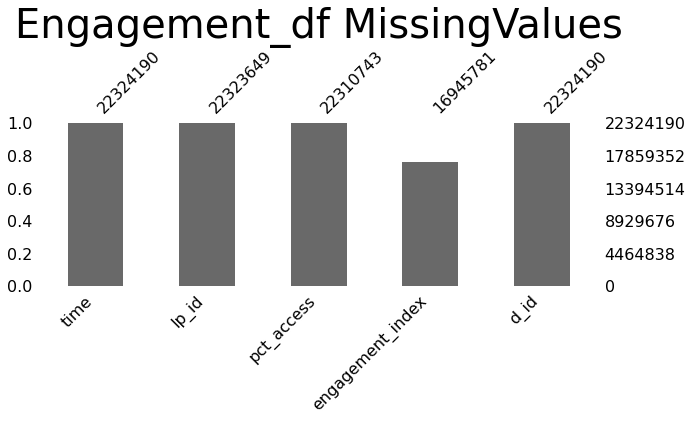

In [3]:
plt.title('Engagement_df MissingValues',fontsize=40)
msno.bar(engage_df,figsize=(10,3),labels=True)

<AxesSubplot:title={'center':'District_info MissingValues'}>

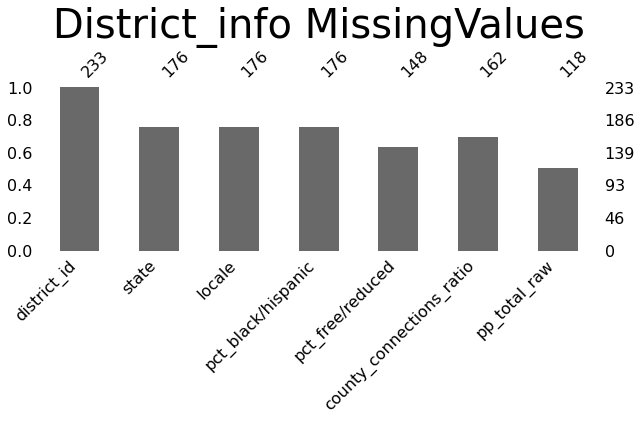

In [4]:
plt.title('District_info MissingValues',fontsize=40)
msno.bar(d_info,figsize=(10,3),labels=True)

<AxesSubplot:title={'center':'Products_info MissingValues'}>

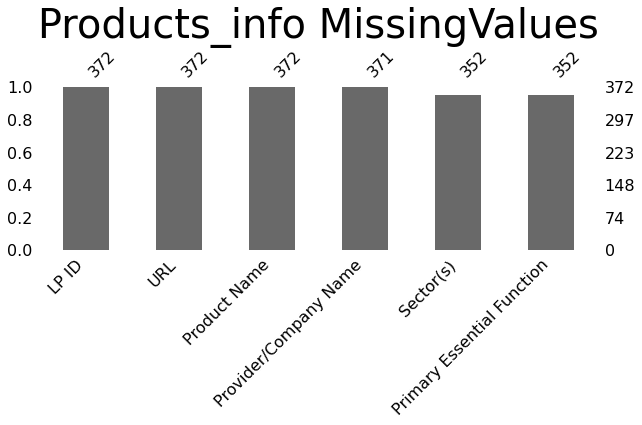

In [5]:
plt.title('Products_info MissingValues',fontsize=40)
msno.bar(p_info,figsize=(10,3),labels=True)

# **Missing Values**

**Engagement data：engagement_index有些遺失值**

**District information data：裡有非常多的遺失值**

在此數據集中，刪除了有關學區的可識別信息。出於數據概括的目的，一些數據點在實際值落入的範圍內發布。此外，還有許多標記為“NaN”的缺失數據表明數據被抑制以最大限度地匿名化數據集。

**Product information data：有些遺失值**

部分商品可能因重複、網址不准確等原因沒有標籤。

------------------------------------------------------------------------------------------------------------------------

# **District information：**

| district_id |：學區標識

| state |：學區所在的州

| locale |：區域設置分類將美國領土分為四種類型的區域：城市、郊區、城鎮和農村

| pct_black/hispanic |：根據 2018-19 NCES 數據，該地區被認定為黑人或西班牙裔學生的百分比

| pct_free/reduced |： 2018-19 NCES 數據的地區學生有資格獲得免費或減價午餐的百分比 

| county_connections_ratio | ：居民中的高速網路比例

| pp_total_raw |項目的每名學生總支出（地方和聯邦支出的總和）。支出數據是逐個學校的，我們用平均值來表示給定學區的支出。

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'State'}, xlabel='count', ylabel='state'>

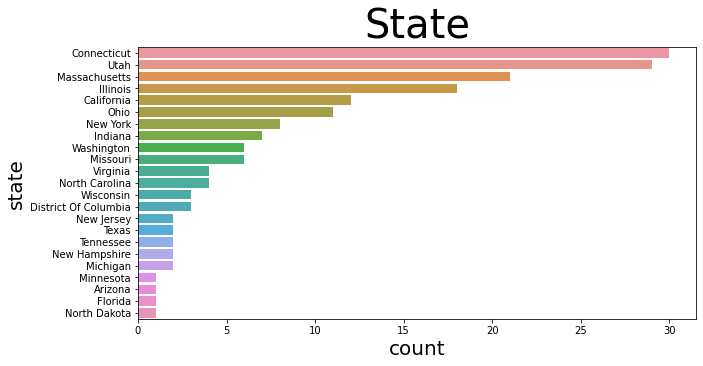

In [7]:
plt.figure(figsize=(10,5))
plt.title('State',fontsize=40)
plt.xlabel('State', fontsize=20)
plt.ylabel('Count', fontsize=20)
sns.countplot(y=d_info['state'],order=d_info['state'].value_counts().index[:])

<AxesSubplot:title={'center':'Pct_black/Hispanic'}, xlabel='count', ylabel='pct_black/hispanic'>

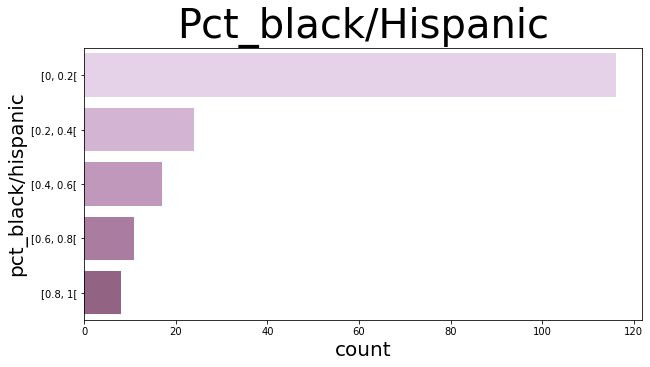

In [8]:
plt.figure(figsize=(10,5))
plt.title('Pct_black/Hispanic',fontsize=40)
plt.xlabel('Pct_black/hispanic', fontsize=20)
plt.ylabel('Count', fontsize=20)
sns.countplot(y=d_info['pct_black/hispanic'],order=d_info['pct_black/hispanic'].value_counts().index[:],palette=sns.cubehelix_palette(8, start=.75, rot=-.150))

<AxesSubplot:title={'center':'Kinds of area'}, xlabel='count', ylabel='locale'>

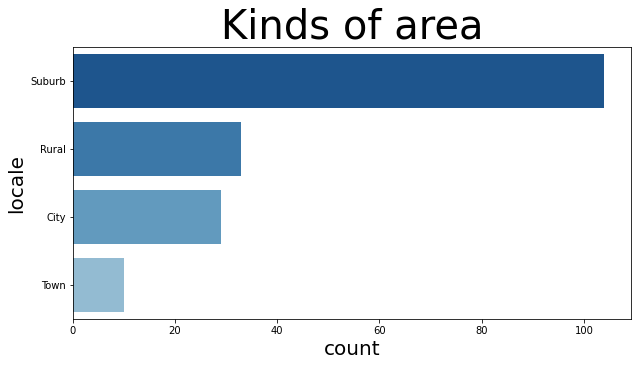

In [9]:
plt.figure(figsize=(10,5))
plt.title('Kinds of area',fontsize=40)
plt.xlabel('Locale', fontsize=20)
plt.ylabel('Count', fontsize=20)
sns.countplot(y=d_info['locale'],order=d_info['locale'].value_counts().index[:],palette=sns.color_palette("Blues_r"))

<AxesSubplot:title={'center':'pct_free/reduced'}, xlabel='count', ylabel='pct_free/reduced'>

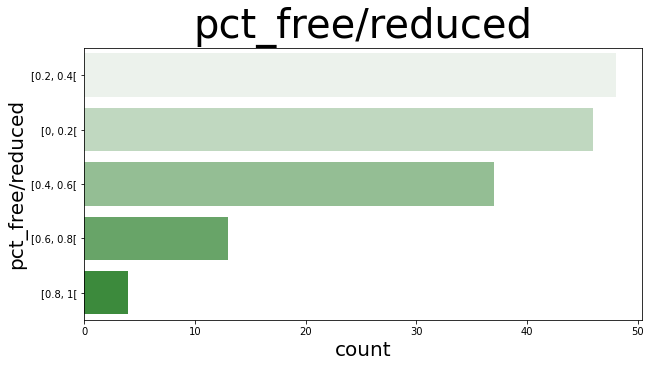

In [10]:
plt.figure(figsize=(10,5))
plt.title('pct_free/reduced',fontsize=40)
plt.xlabel('pct_free/reduced', fontsize=20)
plt.ylabel('Count', fontsize=20)
sns.countplot(y=d_info['pct_free/reduced'],order=d_info['pct_free/reduced'].value_counts().index[:],palette=sns.light_palette("green"))

<AxesSubplot:title={'center':'pp_total_raw'}, xlabel='count', ylabel='pp_total_raw'>

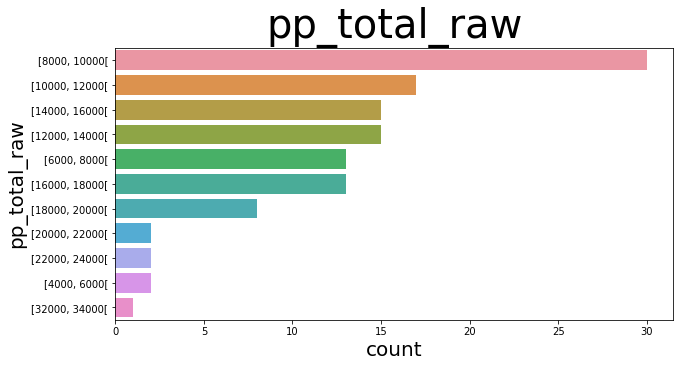

In [11]:
plt.figure(figsize=(10,5))
plt.title('pp_total_raw',fontsize=40)
plt.xlabel('pp_total_raw', fontsize=20)
plt.ylabel('Count', fontsize=20)
sns.countplot(y=d_info['pp_total_raw'],order=d_info['pp_total_raw'].value_counts().index[:])

**District info**
* 康乃狄克州,猶他州,麻薩諸塞邦(麻省)中的學區佔了大多數
* 各個學區中，屬於郊區的最多，而農村和城市排在後面，屬於城鎮的是最少的
* 各個學區當中，黑人或西班牙裔學生的百分比大部分在0~0.2之間
* 各學區學生有資格獲得免費或減價午餐的比例大多在0.6以下

# District Reference

* 康乃狄克州,猶他州,麻薩諸塞邦(麻省)中的學區佔了大多數，那我們是否可以針對這些地區做什麼樣子的方案？
* 學區中在郊區的最多，而郊區相對於其他地區又有什麼樣子的優勢或者劣勢？
* 黑人與西班牙裔學生的比例大部分差距都非常大，那我們是否該針對黑人族群去做努力？
* 學生的平均支出眾數在8000-10000，我們可以針對這個數據對公司政策做什麼改變？


--------------------------------------------------------------------------------------------------------------

# **Product Information：**

有關 2020 年用戶最多的前 372 種產品的特徵信息。

| LP ID|：產品標識

| URL |：特定產品的網頁鏈接

| Product Name |：具體產品名稱

| Provider/Company Name |：產品供應商名稱

| Sector(s) |：使用該產品的教育部門

| Primary Essential Function | ：產品的基本功能。這裡有兩層標籤。產品首先被標記為以下三個類別之一：LC = 學習和課程，CM = 課堂管理，以及 SDO = 學校和學區運營

In [12]:
PEF1=[]
PEF2=[]
for i in p_info['Primary Essential Function']:
    if(not pd.isnull(i)):
        i1 = i.split("-",1)[0].strip()
        PEF1.append(i1)
    else:
        PEF1.append(np.nan)
    if(not pd.isnull(i)):
        i2 = i.split("-",1)[1].strip()
        PEF2.append(i2)
    else:
        PEF2.append(np.nan)
p_info['PEF1']=PEF1
p_info['PEF2']=PEF2

<AxesSubplot:title={'center':'Provider/Company Counts'}, xlabel='count', ylabel='Provider/Company Name'>

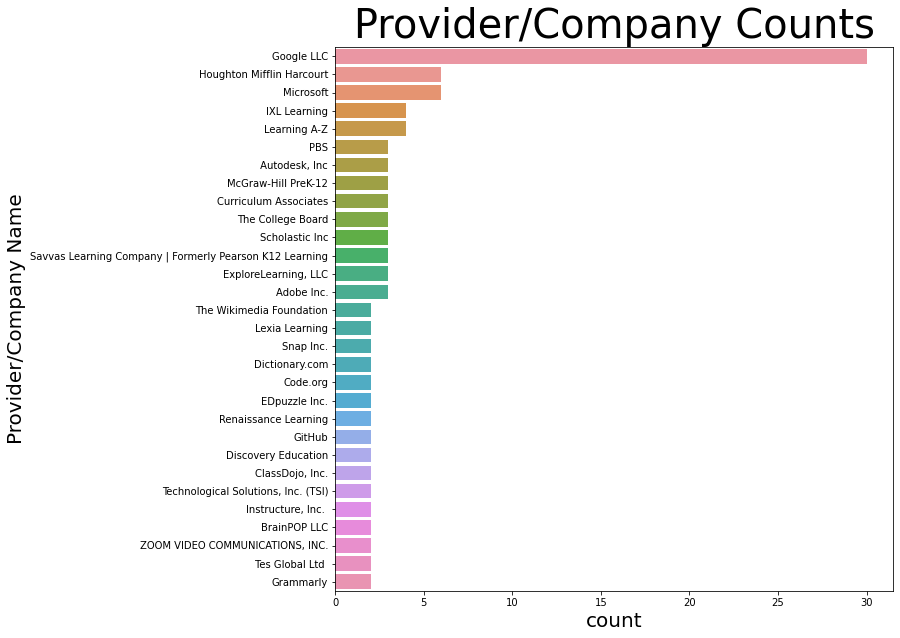

In [13]:
plt.figure(figsize=(10,10))
plt.title('Provider/Company Counts',fontsize=40)
plt.xlabel('Provider/Company Name', fontsize=20)
plt.ylabel('Count', fontsize=20)
sns.countplot(y=p_info['Provider/Company Name'],order=p_info['Provider/Company Name'].value_counts().index[:30])

([<matplotlib.patches.Wedge at 0x7f44c33ded90>,
 [Text(0.05887676054725053, 1.0984232003501482, 'PreK-12'),
  Text(-0.6670384813373681, -0.8746768914377113, 'PreK-12; Higher Ed; Corporate'),
  Text(0.8979277082907138, -0.6353942324917555, 'PreK-12; Higher Ed'),
  Text(1.0996057255514382, -0.029449080367565755, 'Corporate'),
  Text(1.0999561884056863, -0.009817514351120318, 'Higher Ed; Corporate')],
 [Text(0.03211459666213665, 0.5991399274637171, '48.3%'),
  Text(-0.3638391716385644, -0.47709648623875156, '32.7%'),
  Text(0.48977874997675286, -0.34657867226823025, '18.5%'),
  Text(0.5997849412098754, -0.016063134745944955, '0.3%'),
  Text(0.599976102766738, -0.005355007827883809, '0.3%')])

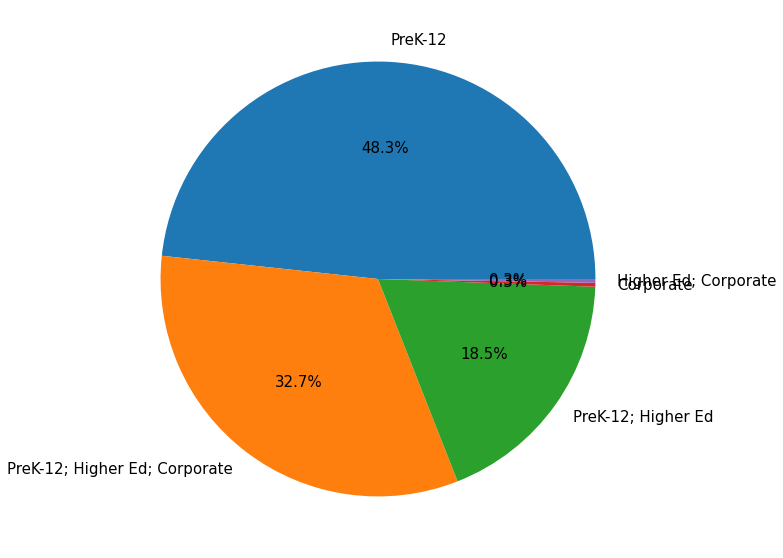

In [14]:
labels=p_info['Sector(s)'].value_counts().index
plt.figure(figsize=(10,10))
plt.pie(p_info['Sector(s)'].value_counts(),                   
        labels =p_info['Sector(s)'].value_counts().index,           
        autopct = "%1.1f%%",        
        pctdistance = 0.6,  
        textprops = {"fontsize" : 15})  

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Essential Function1'}, xlabel='PEF1', ylabel='count'>

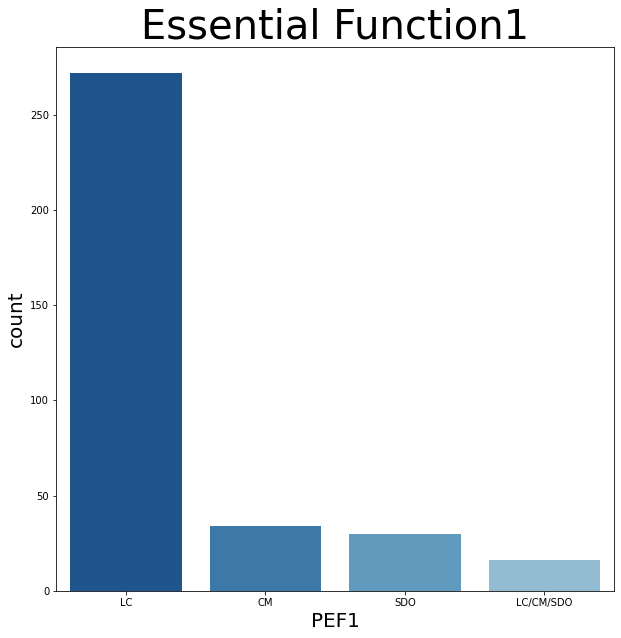

In [15]:
plt.figure(figsize=(10,10))
plt.title('Essential Function1',fontsize=40)
plt.xlabel('Essential Function1', fontsize=20)
plt.ylabel('Count', fontsize=20)
sns.countplot(p_info['PEF1'],order=p_info['PEF1'].value_counts().index[:],palette=sns.color_palette('Blues_r'))

<AxesSubplot:title={'center':'Essential Function2'}, xlabel='count', ylabel='PEF2'>

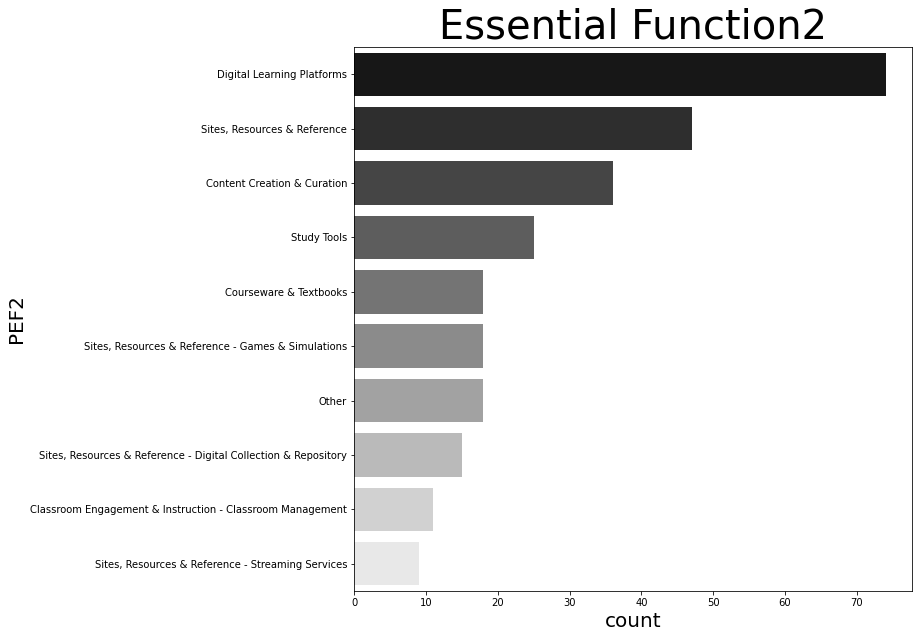

In [16]:
plt.figure(figsize=(10,10))
plt.title('Essential Function2',fontsize=40)
plt.xlabel('Essential Function2', fontsize=20)
plt.ylabel('Count', fontsize=20)
sns.countplot(y=p_info['PEF2'],order=p_info['PEF2'].value_counts().index[:10],palette=sns.color_palette('binary_r',10))

# Products Information Reference
* 數據裡總共提供了372種產品的資訊，其中共有290個供應商/公司，代表大部分公司的產品數量都不多
* 其中google LLC(GOOGLE公司)提供了30個產品
* 根據Sector裡的資料，99.4%的產品裡面都有屬於PerK12的部分，代表著針對學前班到大學前的產品是最多的，而51.5%的產品裡面有屬於高等教育（大學）的部分
    *PerK12:「K–12」是指從幼兒園（Kindergarten，通常5-6歲）到十二年級（grade 12，通常17-18歲）
* 課程種類中，學習和課程>課堂管理>學校和學區運營，並以學習與課程佔了大多數
* 根據ＰＥＦ2給我們的訊息，我們發現整個裡面包含了非常多種學習工具，數字學習平台網站、資源和參考資料、內容創作與策展、課件和教科書、遊戲和模擬等等等等等非常的多，使的每種分類的數量都不是太多，如果下次使用其他標準分類，會不會更好一些？

---------------------------------------------------------------------------------------------------

# **Engagement data：**

Engagement Defined: 客戶參與代表客戶與產品或業務之間的持續溝通聯繫。連接可能包括有關產品、服務或功能的通信。您符合參與資格的互動對您的業務來說是獨一無二的。例如，它可能是客戶瀏覽您博客的時間、訂單價值的平均數量、頁面有多少喜歡或有多少客戶使用您的客戶支持系統。

| time |： 日期

| lp_id |：產品標識

| pct_access | ：該學區學生在某一天至少有一個訪問頁面的百分比

| engagement_index |：該學區在該產品每千名學生訪問頁面的總數

例如，如果 A 區在 2021 年 8 月 10 日對產品 X 的參與指數為 26666.66，則意味著在 2021 年 8 月 10 日，每 1000 名學生中有 26666.66 次頁面加載事件用於產品 X。

In [17]:
engage_df['d_id']=engage_df['d_id'].astype(int)
all_data=pd.merge(engage_df,d_info,left_on='d_id',right_on='district_id')
all_data=pd.merge(all_data,p_info,left_on='lp_id',right_on='LP ID')

In [18]:
day=all_data.groupby('time')
px.line(day['engagement_index'].sum(),title='All Products Everyday Page Load')

* 藉由上圖我們可以發現美國在1/21疫情爆發後，運用數位學習的次數上升得十分明顯
* 而在7.8月因為學生放假處於低點
* 開學後，數位學習次數明顯升高，甚至是疫情爆發前的4倍
* 週六週日的數位學習平台使用率都非常的低

In [19]:
def time_series(df,col1,col2,col3):
    list1 = df[[col1,col2]].groupby([col1])[col2].sum().sort_values(ascending=False).index[:10].tolist()
    
    df = df[df[col1].isin(list1)].reset_index(drop=True)[[col3, col1, col2]]

    df = df.pivot_table(index=col3, columns=col1, values=col2)

    fig = px.line(df, facet_col=col1, facet_col_wrap=1, width=800, height=800)

    fig.show()

# **Time series**

In [20]:
time_series(all_data,"locale","engagement_index","time")

* 不管是城市、郊區、城鎮和農村，訪問數位學習的人數都在2/12這天突然暴增
* 大多數地區在放完暑假後，訪問數位學習頁面的數量都是上升的，而在城鎮地區，在放完暑假過後，相較於四月份，訪問數位學習頁面的數量反而是向下降的，這是發生什麼事了呢？

In [21]:
time_series(all_data,"state","engagement_index","time")

In [22]:
products=all_data.groupby('Product Name')
top10=products.engagement_index.sum().sort_values(ascending=False).head(10)
top10=pd.DataFrame(top10)
top10=top10.reset_index()

<AxesSubplot:title={'center':'TOP10 Product Page Load'}, xlabel='engagement_index', ylabel='Product Name'>

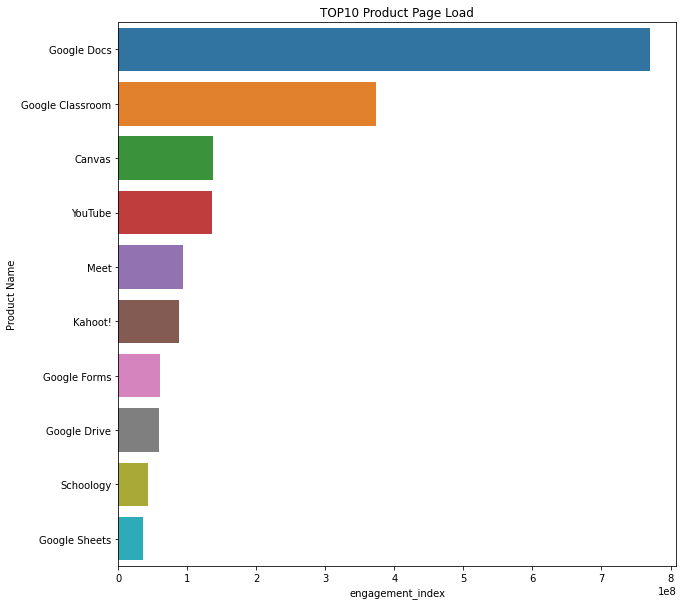

In [23]:
plt.figure(figsize=(10,10))
plt.title('TOP10 Product Page Load')
sns.barplot(y='Product Name',x='engagement_index',data=top10)

* 由上圖我們可以發現，GOOGLE的各項產品頁面訪問總量占據了前十名中的五個名次，尤其是第一名的GOOGLE DOCS遙遙領先其他產品

# Reference
**藉由競賽給予的數據，我們發現到一些有趣的情況：**
* 康乃狄克州,猶他州,麻薩諸塞邦(麻省)中的學區非常的多，我們是不是能夠針對這些地區去做特別的推廣？

* 學生的**平均支出眾數在8000-10000**，而支出在10000-18000的學生也是非常的多，從營利方面來說，我們是否可以推出什麼樣子的方案，讓支出相對來說大的學生在數位學習上花更多的錢？
* 產品裡面有**99.4%是含有針對學前班到大學前的**，代表說目前幾乎每個數位學習產品都有針對大學前的學生，而**51.5%的產品裡面有屬於高等教育**（大學）的部分
* 我們發現整個產品數據裡面分成了非常多種學習工具，若是我們把這些功能相近的工具合併起來，可能可以讓我們更了解學生更多使用哪些種類的工具，並從裡面制定更好的策略
* 在疫情漸漸趨緩的現在，許多地區的政策都已經漸漸開放，但是疫情前疫情後人們的習慣相差甚大，藉由上面的時間序列圖我們可以很明顯的看到疫情爆發前後的差異，在這個對於互聯網的黃金時期，我們是否能把握機會做些什麼事情？
* 大部分種類的地區在9月過後訪問數位學習頁面的數持續上升，而**城鎮地區訪問數位學習頁面的數量是向下降的**，關於這點，我認為可以深入探討一番，是地區的關係嗎？還是城鎮地區疫情趨緩？還是他們比較不需要數位學習？